In [1]:
pip install evidently==0.2.8 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [1]:
pip install evidently 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import evidently
from evidently.report import Report
from evidently.metrics import ColumnDriftMetric

In [3]:
# Charger les datasets
train_data = pd.read_csv('C:/Users/paulm/Documents/Projet 7/Projet7withCSV/data/application_train.csv')
test_data = pd.read_csv('C:/Users/paulm/Documents/Projet 7/Projet7withCSV/data/application_test.csv')

# Afficher les premières lignes des datasets pour vérification
print("Train Data:")
print(train_data.head())
print("\nTest Data:")
print(test_data.head())                                      

Train Data:
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0 

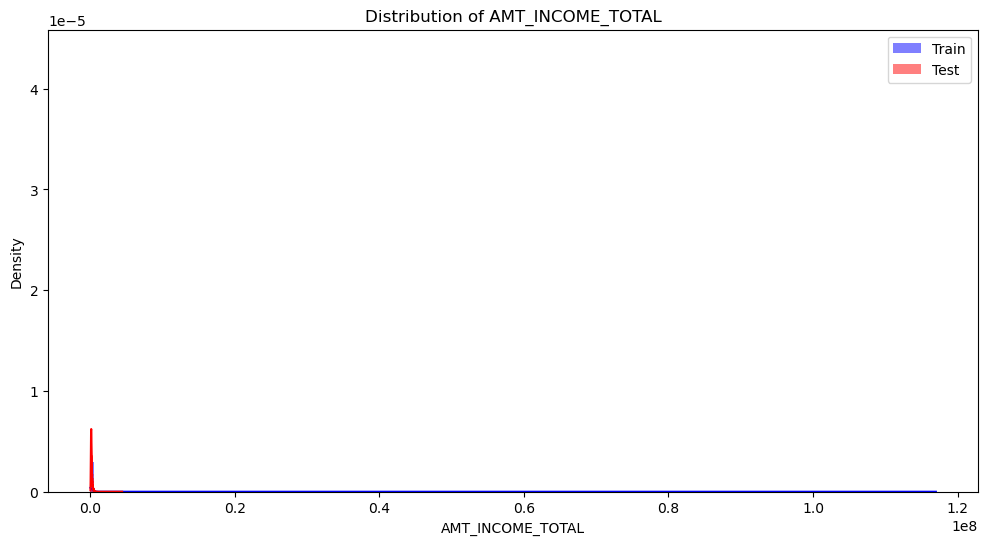

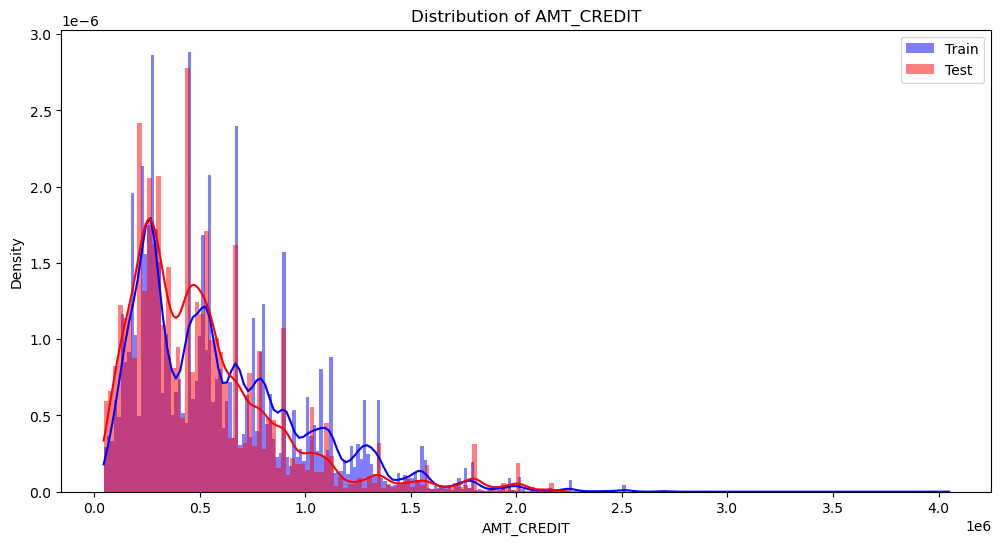

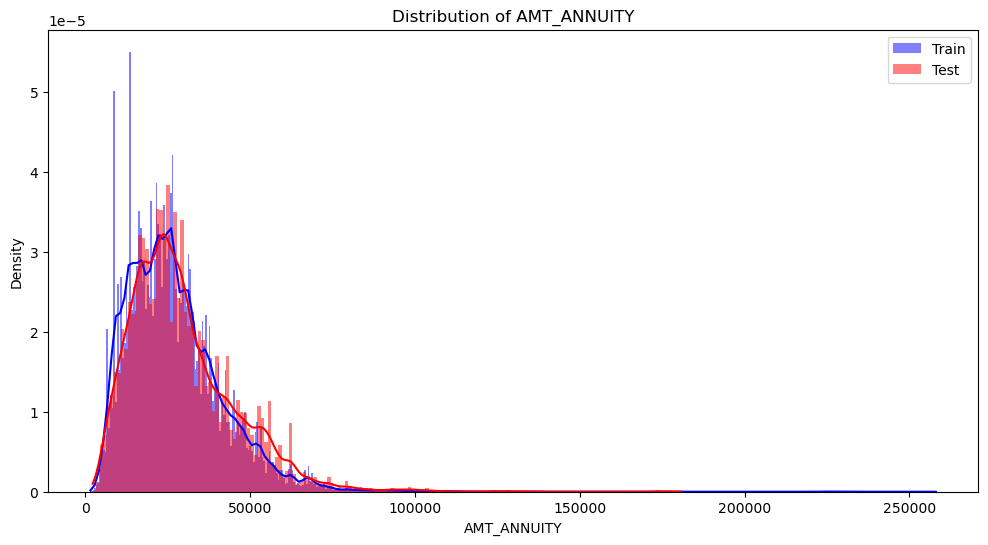

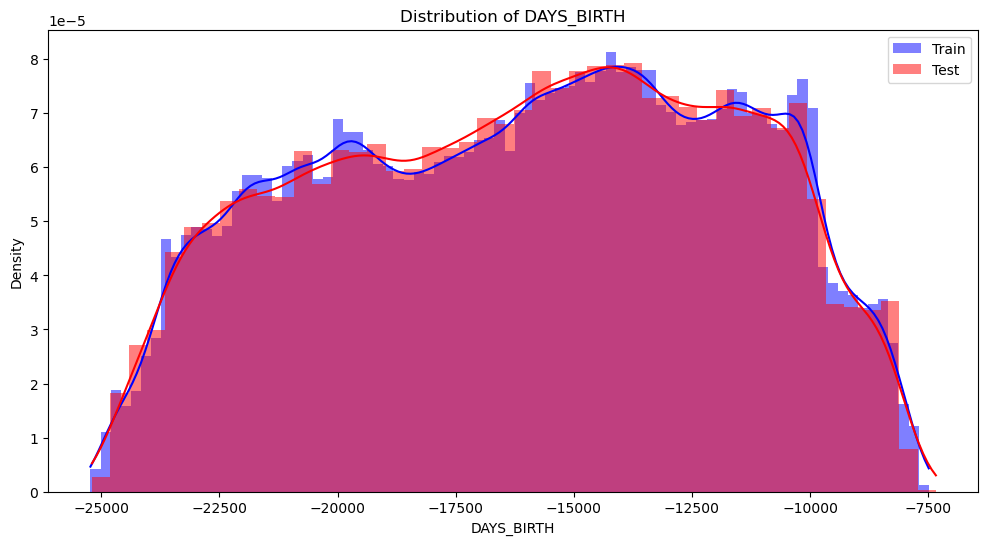

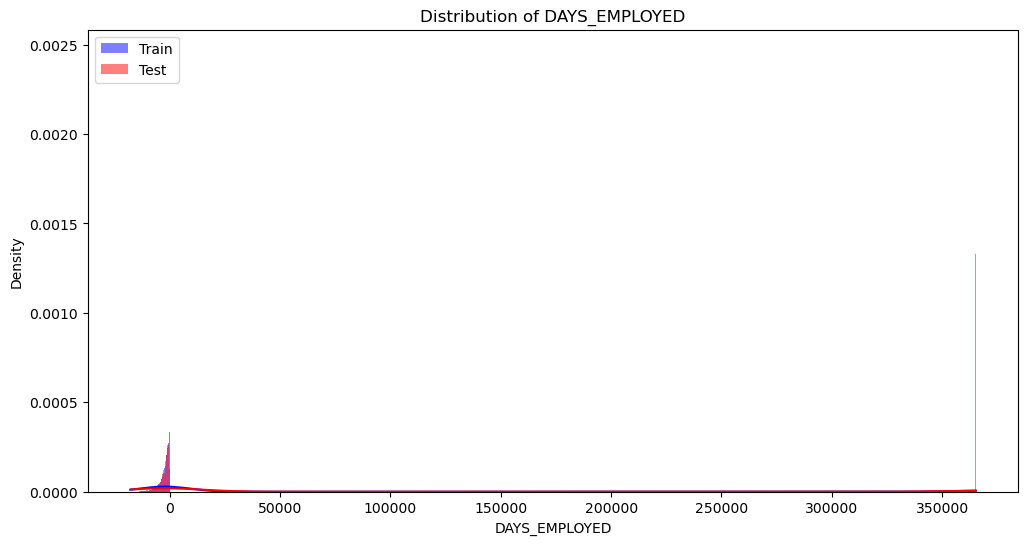

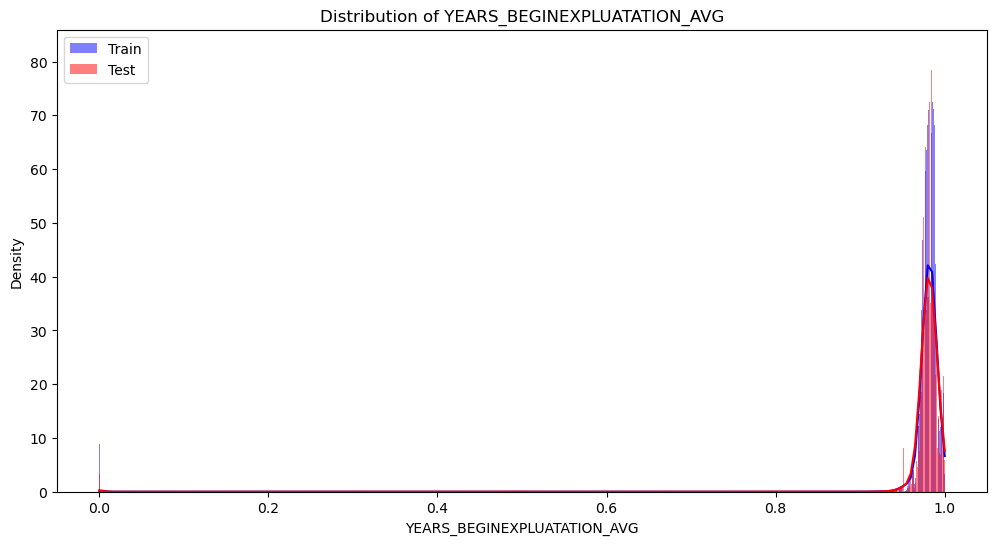

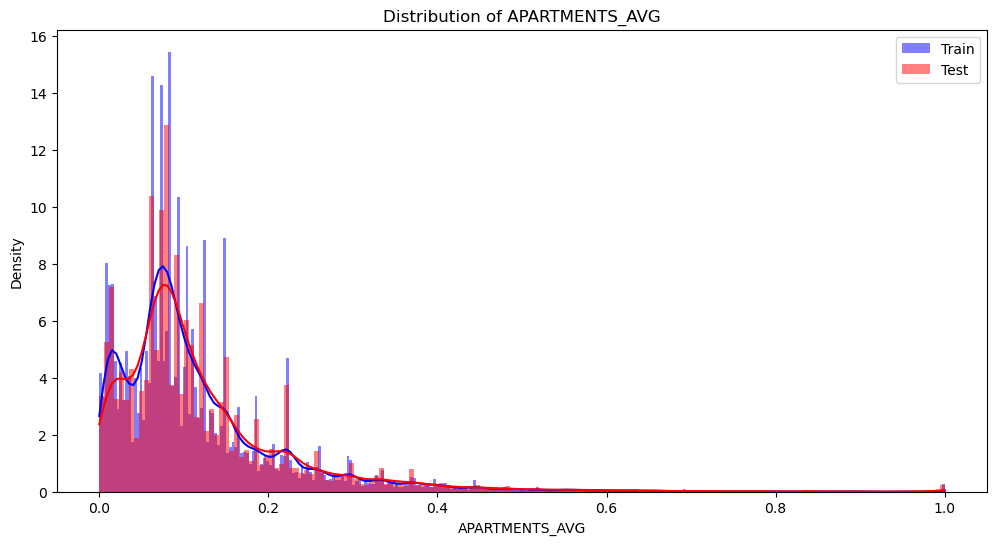

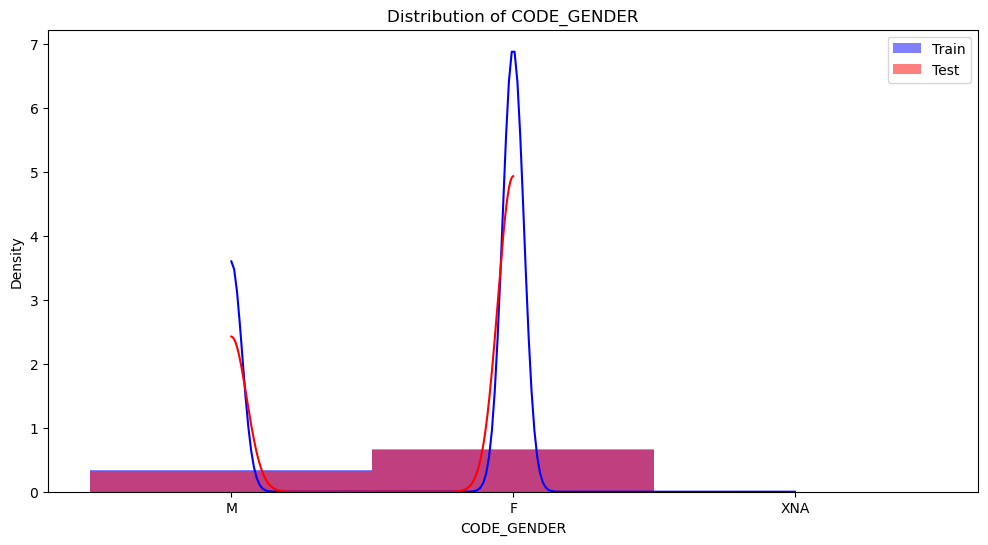

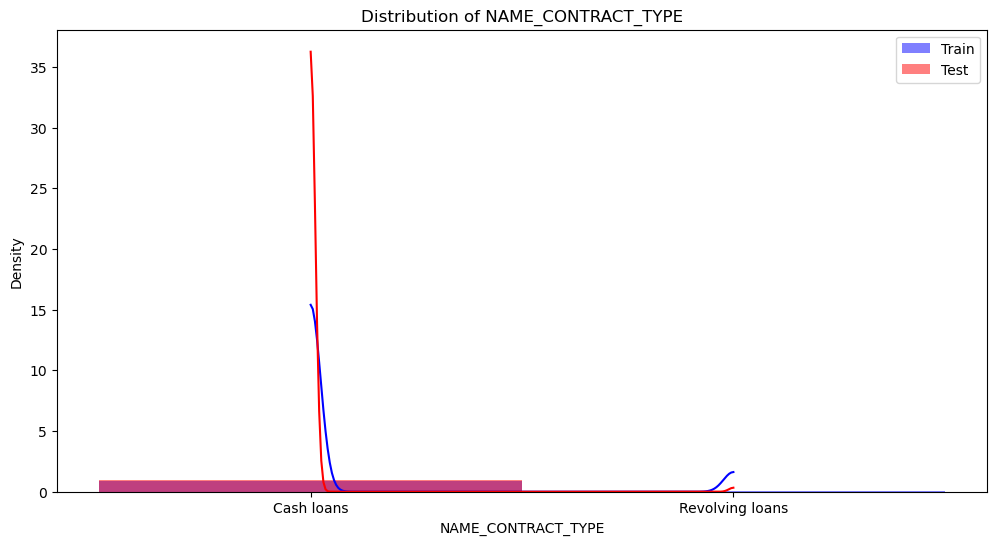

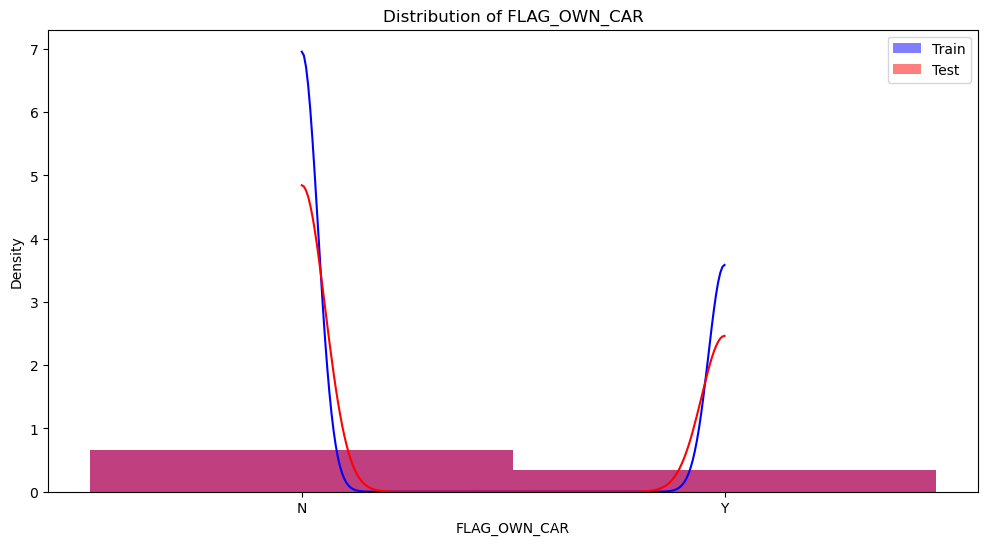

In [10]:
# Fonction pour tracer la distribution des features
def plot_feature_distribution(train_df, test_df, feature):
    plt.figure(figsize=(12, 6))
    sns.histplot(train_df[feature], kde=True, color='blue', label='Train', stat='density', linewidth=0)
    sns.histplot(test_df[feature], kde=True, color='red', label='Test', stat='density', linewidth=0)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Liste des features à comparer (exemple)
features_to_compare = [
    'AMT_INCOME_TOTAL', 
    'AMT_CREDIT', 
    'AMT_ANNUITY', 
    'DAYS_BIRTH', 
    'DAYS_EMPLOYED', 
    'YEARS_BEGINEXPLUATATION_AVG',
    'APARTMENTS_AVG',
    'CODE_GENDER',
    'NAME_CONTRACT_TYPE',
    'FLAG_OWN_CAR'
]

for feature in features_to_compare:
    plot_feature_distribution(train_data, test_data, feature)

In [11]:
from scipy.stats import ks_2samp

# Fonction pour tester la similarité des distributions entre train et test
def test_feature_distribution(train_df, test_df, feature):
    stat, p_value = ks_2samp(train_df[feature], test_df[feature])
    return stat, p_value

# Tester chaque feature
for feature in features_to_compare:
    stat, p_value = test_feature_distribution(train_data, test_data, feature)
    print(f'Feature: {feature}, KS Statistic: {stat:.4f}, p-value: {p_value:.4f}')


Feature: AMT_INCOME_TOTAL, KS Statistic: 0.0568, p-value: 0.0000
Feature: AMT_CREDIT, KS Statistic: 0.1162, p-value: 0.0000
Feature: AMT_ANNUITY, KS Statistic: nan, p-value: nan
Feature: DAYS_BIRTH, KS Statistic: 0.0078, p-value: 0.0124
Feature: DAYS_EMPLOYED, KS Statistic: 0.0208, p-value: 0.0000
Feature: YEARS_BEGINEXPLUATATION_AVG, KS Statistic: nan, p-value: nan
Feature: APARTMENTS_AVG, KS Statistic: nan, p-value: nan
Feature: CODE_GENDER, KS Statistic: 0.0121, p-value: 0.0000
Feature: NAME_CONTRACT_TYPE, KS Statistic: 0.0862, p-value: 0.0000
Feature: FLAG_OWN_CAR, KS Statistic: 0.0030, p-value: 0.8480


In [13]:
# Vérifier les valeurs manquantes dans les colonnes avec NaN pour train_data
for feature in ['AMT_ANNUITY', 'YEARS_BEGINEXPLUATATION_AVG', 'APARTMENTS_AVG']:
    print(f"{feature} - Train Data NaNs: {train_data[feature].isna().sum()}")
    print(f"{feature} - Test Data NaNs: {test_data[feature].isna().sum()}")

# Vérifier si les colonnes sont constantes
for feature in ['AMT_ANNUITY', 'YEARS_BEGINEXPLUATATION_AVG', 'APARTMENTS_AVG']:
    print(f"{feature} - Train Data Unique Values: {train_data[feature].nunique()}")
    print(f"{feature} - Test Data Unique Values: {test_data[feature].nunique()}")

AMT_ANNUITY - Train Data NaNs: 12
AMT_ANNUITY - Test Data NaNs: 24
YEARS_BEGINEXPLUATATION_AVG - Train Data NaNs: 150007
YEARS_BEGINEXPLUATATION_AVG - Test Data NaNs: 22856
APARTMENTS_AVG - Train Data NaNs: 156061
APARTMENTS_AVG - Test Data NaNs: 23887
AMT_ANNUITY - Train Data Unique Values: 13672
AMT_ANNUITY - Test Data Unique Values: 7491
YEARS_BEGINEXPLUATATION_AVG - Train Data Unique Values: 285
YEARS_BEGINEXPLUATATION_AVG - Test Data Unique Values: 175
APARTMENTS_AVG - Train Data Unique Values: 2339
APARTMENTS_AVG - Test Data Unique Values: 1543


In [5]:
pip install evidently --upgrade

  Using cached evidently-0.4.34-py3-none-any.whl.metadata (11 kB)
Using cached evidently-0.4.34-py3-none-any.whl (3.4 MB)
  Attempting uninstall: evidently
    Found existing installation: evidently 0.4.19
    Uninstalling evidently-0.4.19:
      Successfully uninstalled evidently-0.4.19
Note: you may need to restart the kernel to use updated packages.


In [20]:
from evidently.tabs import DataDriftTab

In [31]:
from evidently.report import Report
from evidently.tabs import DataDriftTab

In [8]:
# Supprimer la colonne "target" du dataset d'entraînement (si nécessaire)
if "TARGET" in train_data.columns:
    train_data = train_data.drop("TARGET", axis=1)

In [9]:
print(train_data.columns)

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)


In [10]:
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset

# Créer un rapport de dérive des données en utilisant DataDriftPreset
drift_report = Report(metrics=[DataDriftPreset()])

# Exécuter le rapport avec les ensembles de données d'entraînement et de test
drift_report.run(reference_data=train_data, current_data=test_data)

# Sauvegarder le rapport en HTML
drift_report.save_html('data_drift_report.html')

In [30]:
print("Colonnes dans train_data :", train_data.columns)
print("Colonnes dans test_data :", test_data.columns)

Colonnes dans train_data : Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)
Colonnes dans test_data : Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON',

### Enregistrement des scores dans un CSV

In [1]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [24]:
import joblib

# Charger le modèle
model = joblib.load('C:/Users/paulm/Documents/Projet 7/Projet7withCSV/model/xgboost_model.pkl')

# Charger les données de test
## test_data = pd.read_csv('C:/Users/paulm/Documents/Projet 7/Projet7withCSV/model_drift_analysis/X_test_predictionV2.csv')

# Faire des prédictions
predictions_proba = model.predict_proba(test_data)[:, 1]  # Probabilités pour la classe positive

# Ajouter les scores au dataframe de test
test_data['prediction_proba'] = predictions_proba

# Sauvegarder les prédictions et les scores dans un fichier CSV
test_data[['SK_ID_CURR', 'prediction_proba']].to_csv('predictions_with_scores.csv', index=False)

In [31]:
train_data = pd.read_csv('C:/Users/paulm/Documents/Projet 7/Projet7withCSV/data/X_prediction.csv')

In [32]:
# Faire des prédictions
predictions_proba_train = model.predict_proba(train_data)[:, 1]  # Probabilités pour la classe positive

# Ajouter les scores au dataframe d'entraînement
train_data['prediction_proba'] = predictions_proba_train

In [33]:
# Sauvegarder les prédictions et les scores dans un fichier CSV
train_data[['SK_ID_CURR', 'prediction_proba']].to_csv('train_scores.csv', index=False)

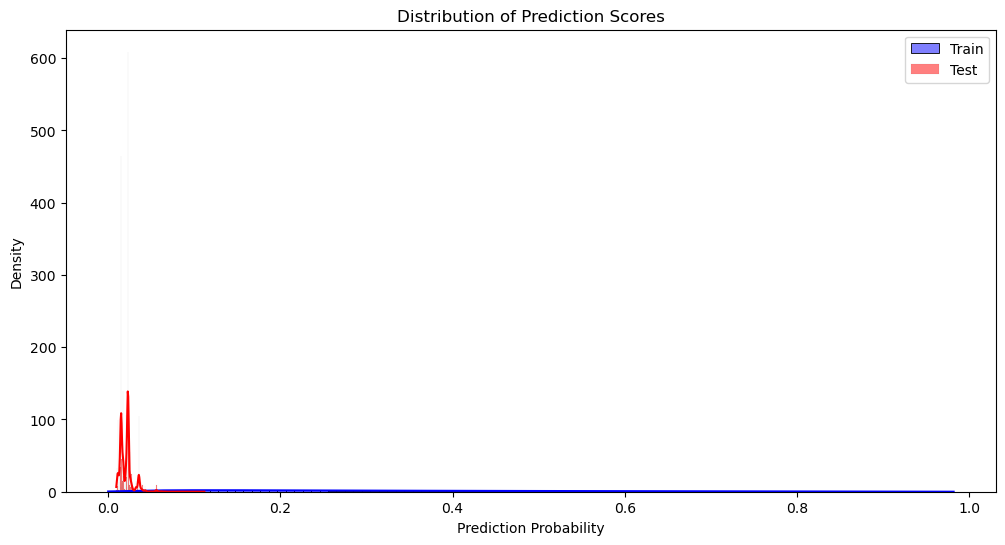

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les scores d'entraînement et de test
train_scores = pd.read_csv('train_scores.csv')
test_scores = pd.read_csv('predictions_with_scores.csv')

# Tracer les distributions des scores
plt.figure(figsize=(12, 6))
sns.histplot(train_scores['prediction_proba'], kde=True, color='blue', label='Train', stat='density')
sns.histplot(test_scores['prediction_proba'], kde=True, color='red', label='Test', stat='density')
plt.title('Distribution of Prediction Scores')
plt.xlabel('Prediction Probability')
plt.ylabel('Density')
plt.legend()
plt.show()

In [6]:
# Afficher les colonnes du dataset de test
print("Colonnes du dataset de test :")
print(test_data.columns.tolist())

Colonnes du dataset de test :
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLU

In [7]:
# Charger le modèle
model = joblib.load('C:/Users/paulm/Documents/Projet 7/Projet7withCSV/model/xgboost_model.pkl')

# Obtenir les noms de caractéristiques du modèle
feature_names = model.get_booster().feature_names

print("Colonnes attendues par le modèle :")
print(feature_names)

Colonnes attendues par le modèle :
['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'E

In [8]:
# Charger les données d'entraînement (ou les colonnes attendues)
expected_columns = feature_names  # Par exemple, les noms de colonnes du modèle
test_columns = test_data.columns.tolist()

# Trouver les colonnes présentes dans le test mais pas dans les attentes
extra_columns = [col for col in test_columns if col not in expected_columns]
missing_columns = [col for col in expected_columns if col not in test_columns]

print("Colonnes supplémentaires dans le dataset de test :")
print(extra_columns)

print("Colonnes manquantes dans le dataset de test :")
print(missing_columns)

Colonnes supplémentaires dans le dataset de test :
[]
Colonnes manquantes dans le dataset de test :
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [9]:
print(f"Nombre de colonnes dans le dataset de test : {len(test_columns)}")
print(f"Nombre de colonnes attendues par le modèle : {len(expected_columns)}")

Nombre de colonnes dans le dataset de test : 485
Nombre de colonnes attendues par le modèle : 499


In [10]:
# Vérifier les colonnes non numériques dans le dataset de test
non_numeric_cols_test = test_data.select_dtypes(exclude=[np.number]).columns
print("Colonnes non numériques dans le dataset de test :")
print(non_numeric_cols_test)

Colonnes non numériques dans le dataset de test :
Index([], dtype='object')


In [18]:
from sklearn.preprocessing import OrdinalEncoder

# Charger les données de test
test_data = pd.read_csv('C:/Users/paulm/Documents/Projet 7/Projet7withCSV/model_drift_analysis/X_test_predictionV2.csv')

# Liste des colonnes manquantes
missing_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
                    'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FONDKAPREMONT_MODE', 
                    'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

# Ajouter les colonnes manquantes avec des valeurs NaN
for col in missing_columns:
    if col not in test_data.columns:
        test_data[col] = pd.NA

# Assurez-vous que les colonnes sont dans le même ordre que celles du modèle
expected_columns = missing_columns  # Assurez-vous que c'est l'ordre correct
if 'SK_ID_CURR' in test_data.columns:
    test_data = test_data[expected_columns + ['SK_ID_CURR']]
else:
    test_data = test_data[expected_columns]

# Convertir les colonnes avec NaN en type float64
for col in test_data.columns:
    if test_data[col].dtype == 'object':
        test_data[col] = pd.to_numeric(test_data[col], errors='coerce')

# Initialiser OrdinalEncoder pour les colonnes catégorielles
categorical_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
                        'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FONDKAPREMONT_MODE', 
                        'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

# Encoder les colonnes catégorielles si elles existent dans les données
for col in categorical_columns:
    if col in test_data.columns:
        # Convertir les colonnes catégorielles en type catégorie
        test_data[col] = test_data[col].astype('category')

# Encoder les colonnes catégorielles avec OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
test_data[categorical_columns] = ordinal_encoder.fit_transform(test_data[categorical_columns])

# Sauvegarder les données prétraitées
test_data.to_csv('C:/Users/paulm/Documents/Projet 7/Projet7withCSV/model_drift_analysis/X_test_prediction_encoded.csv', index=False)

# Vérifiez les modifications
print(test_data.head())
print(test_data.dtypes)


   NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                 NaN          NaN           NaN              NaN   
1                 NaN          NaN           NaN              NaN   
2                 NaN          NaN           NaN              NaN   
3                 NaN          NaN           NaN              NaN   
4                 NaN          NaN           NaN              NaN   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0              NaN               NaN                  NaN                 NaN   
1              NaN               NaN                  NaN                 NaN   
2              NaN               NaN                  NaN                 NaN   
3              NaN               NaN                  NaN                 NaN   
4              NaN               NaN                  NaN                 NaN   

   NAME_HOUSING_TYPE  WEEKDAY_APPR_PROCESS_START  FONDKAPREMONT_MODE  \
0                NaN      

In [23]:
# Chemin vers les fichiers
chemin_X_prediction = 'C:/Users/paulm/Documents/Projet 7/Projet7withCSV/data/X_prediction.csv'
chemin_X_test = 'C:/Users/paulm/Documents/Projet 7/Projet7withCSV/model_drift_analysis/X_test_predictionV2.csv'
chemin_X_test_final = 'C:/Users/paulm/Documents/Projet 7/Projet7withCSV/model_drift_analysis/X_test_prediction_encoded.csv'

# Charger le fichier d'entraînement pour obtenir l'ordre des colonnes
df_train = pd.read_csv(chemin_X_prediction)
colonnes_attendues = df_train.columns.tolist()

# Charger les données de test
test_data = pd.read_csv(chemin_X_test)

# Ajouter les colonnes manquantes avec des valeurs NaN
colonnes_manquantes = [col for col in colonnes_attendues if col not in test_data.columns]
for col in colonnes_manquantes:
    test_data[col] = pd.NA

# Réorganiser les colonnes du DataFrame de test pour qu'elles correspondent à l'ordre du fichier d'entraînement
test_data = test_data[colonnes_attendues]

# Vérifier et convertir les types de données si nécessaire
for col in test_data.columns:
    if test_data[col].dtype == 'object':
        test_data[col] = pd.to_numeric(test_data[col], errors='coerce')

# Enregistrer le DataFrame de test prétraité dans un fichier CSV
test_data.to_csv(chemin_X_test_final, index=False)

# Vérifiez les modifications
print(test_data.head())
print(test_data.columns)

   SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100001                 NaN          NaN           NaN              NaN   
1      100005                 NaN          NaN           NaN              NaN   
2      100013                 NaN          NaN           NaN              NaN   
3      100028                 NaN          NaN           NaN              NaN   
4      100038                 NaN          NaN           NaN              NaN   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0     -0.563843         -0.388937    0.342238    -0.579087         0.165654   
1     -0.563843         -1.124703   -0.953771    -0.858210        -1.031148   
2     -0.563843          0.662157    0.656255     1.971374         0.754245   
3      2.278347          1.389838    2.285562     1.394484         2.467698   
4      0.857252          0.371085    0.529546     0.360557         0.747705   

   ...  CC_CNT_INSTALMENT_MATURE_CUM_M

In [20]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NAME_CONTRACT_TYPE          0 non-null      float64
 1   CODE_GENDER                 0 non-null      float64
 2   FLAG_OWN_CAR                0 non-null      float64
 3   FLAG_OWN_REALTY             0 non-null      float64
 4   NAME_TYPE_SUITE             0 non-null      float64
 5   NAME_INCOME_TYPE            0 non-null      float64
 6   NAME_EDUCATION_TYPE         0 non-null      float64
 7   NAME_FAMILY_STATUS          0 non-null      float64
 8   NAME_HOUSING_TYPE           0 non-null      float64
 9   WEEKDAY_APPR_PROCESS_START  0 non-null      float64
 10  FONDKAPREMONT_MODE          0 non-null      float64
 11  HOUSETYPE_MODE              0 non-null      float64
 12  WALLSMATERIAL_MODE          0 non-null      float64
 13  EMERGENCYSTATE_MODE         0 n

In [21]:
test_data.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,SK_ID_CURR
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100001
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100005
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100013
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100028
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100038
